In [ ]:
import os, random
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')

num_classes = 6

# Paths & class labels
base_path = "/content/drive/MyDrive/4995DLCV Final Project/Dataset"

# Defining our 6 age classes and their corresponding folders
age_classes = [
    "Pre-school (3-6)",
    "Children (7-12)",
    "Teens (13-17)",
    "Young Adults (18-40)",
    "Adults (40-65)",
    "Seniors (65+)"
]

# Mapping each class to its folder path with preprocessed images
class_folders = {
    "Pre-school (3-6)": f"{base_path}/Pre-school (3-6)",
    "Children (7-12)": f"{base_path}/Children (7-12)",
    "Teens (13-17)": f"{base_path}/Teens (13-17)",
    "Young Adults (18-40)": f"{base_path}/Young Adults (18-40)",
    "Adults (40-65)": f"{base_path}/Adults (40-65)",
    "Seniors (65+)": f"{base_path}/Seniors (65+)"
}


Mounted at /content/drive


In [ ]:
#SKIP IF ALREADY SPLIT

import os
import shutil
import random
from tqdm import tqdm

def create_train_test_val_split(source_paths, destination_base, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42):
    """
    Collect images from multiple source paths and split into train/val/test

    Parameters:
    - source_paths: list of paths to collect images from
    - destination_base: base path where train/val/test folders will be created
    - train_ratio: proportion for training (default 0.7)
    - val_ratio: proportion for validation (default 0.15)
    - test_ratio: proportion for testing (default 0.15)
    - seed: random seed for reproducibility
    """

    # Create train/val/test directories
    train_dir = os.path.join(destination_base, "train")
    val_dir = os.path.join(destination_base, "val")
    test_dir = os.path.join(destination_base, "test")

    for directory in [train_dir, val_dir, test_dir]:
        os.makedirs(directory, exist_ok=True)

    # Collect all image files from all source paths
    all_images = []
    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff']

    # Checking if source path exists
    for source_path in source_paths:
        if not os.path.exists(source_path):
            print(f"Warning: {source_path} does not exist. Skipping.")
            continue

        print(f"Collecting images from: {source_path}")
        for filename in os.listdir(source_path):
            if any(filename.lower().endswith(ext) for ext in image_extensions):
                full_path = os.path.join(source_path, filename)
                all_images.append(full_path)

    print(f"\nTotal images collected: {len(all_images)}")

    if len(all_images) == 0:
        print("No images found.")
        return

    # Shuffle images
    random.seed(seed)
    random.shuffle(all_images)

    # Calculate split sizes
    n = len(all_images)
    train_size = int(train_ratio * n)
    val_size = int(val_ratio * n)
    # test_size is remainder

    # Split the data
    train_images = all_images[:train_size]
    val_images = all_images[train_size:train_size + val_size]
    test_images = all_images[train_size + val_size:]

    print(f"\nSplit sizes:")
    print(f"  Train: {len(train_images)} ({len(train_images)/n*100:.1f}%)")
    print(f"  Val:   {len(val_images)} ({len(val_images)/n*100:.1f}%)")
    print(f"  Test:  {len(test_images)} ({len(test_images)/n*100:.1f}%)")

    # Copy files to respective directories
    print("\nCopying files...")

    for img_path in tqdm(train_images, desc="Copying to train"):
        filename = os.path.basename(img_path)
        dest_path = os.path.join(train_dir, filename)
        # Handle duplicate filenames
        counter = 1
        while os.path.exists(dest_path):
            base, ext = os.path.splitext(filename)
            dest_path = os.path.join(train_dir, f"{base}_{counter}{ext}")
            counter += 1
        shutil.copy(img_path, dest_path)

    for img_path in tqdm(val_images, desc="Copying to val"):
        filename = os.path.basename(img_path)
        dest_path = os.path.join(val_dir, filename)
        counter = 1
        while os.path.exists(dest_path):
            base, ext = os.path.splitext(filename)
            dest_path = os.path.join(val_dir, f"{base}_{counter}{ext}")
            counter += 1
        shutil.copy(img_path, dest_path)

    for img_path in tqdm(test_images, desc="Copying to test"):
        filename = os.path.basename(img_path)
        dest_path = os.path.join(test_dir, filename)
        counter = 1
        while os.path.exists(dest_path):
            base, ext = os.path.splitext(filename)
            dest_path = os.path.join(test_dir, f"{base}_{counter}{ext}")
            counter += 1
        shutil.copy(img_path, dest_path)

    print("\nSplit complete")
    print(f"Train directory: {train_dir}")
    print(f"Val directory:   {val_dir}")
    print(f"Test directory:  {test_dir}")

# DATA ORGANIZATION

base_path = "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Young Adults (18-40)"

# Dataset 1: Has Handwriting and Drawing subdirectories (skip if not Pre-school and Children)

print("\n--- Processing Dataset 1 (Handwriting + Drawing) ---")

dataset1_sources = [
    f"{base_path}/dataset1 (Handwriting and Drawing Based Early Detection of A)/Processed/Handwriting",
    f"{base_path}/dataset1 (Handwriting and Drawing Based Early Detection of A)/Processed/Drawing"
]

# Create train/val/test in the teens base directory
dataset1_destination = base_path

create_train_test_val_split(
    source_paths=dataset1_sources,
    destination_base=dataset1_destination,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15
)

# Dataset 1: Simple Preprocessed directory

print("\n--- Processing Dataset 1 ---")

dataset2_sources = [
    f"{base_path}/HandPD dataset/Age_18-40_Control_Processed"
]

dataset_destination = base_path

create_train_test_val_split(
    source_paths=dataset2_sources,
    destination_base=dataset_destination,  # Add to same train/val/test folders
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15
)

# Dataset 2: Simple Preprocessed directory

print("\n--- Processing Dataset 2 ---")

dataset3_sources = [
    f"{base_path}/hebrew_age_18-40"
]

create_train_test_val_split(
    source_paths=dataset3_sources,
    destination_base=dataset_destination,  # Add to same train/val/test folders
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15
)

# Dataset 3: Simple Preprocessed directory

print("\n--- Processing Dataset 3 ---")

dataset3_sources = [
    f"{base_path}/bangla 18-40_gray_on_white"
]

create_train_test_val_split(
    source_paths=dataset3_sources,
    destination_base=dataset_destination,  # Add to same train/val/test folders
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15
)

# VERIFICATION
print("\n" + "="*70)
print("VERIFICATION")
print("="*70)

train_count = len(os.listdir(f"{base_path}/train"))
val_count = len(os.listdir(f"{base_path}/val"))
test_count = len(os.listdir(f"{base_path}/test"))

print(f"\nFinal counts for Teens (13-17):")
print(f"  Train: {train_count} images")
print(f"  Val:   {val_count} images")
print(f"  Test:  {test_count} images")
print(f"  Total: {train_count + val_count + test_count} images")

# Show sample files from each split
print(f"\nSample train files:")
for f in os.listdir(f"{base_path}/train")[:5]:
    print(f"  - {f}")

print(f"\nSample val files:")
for f in os.listdir(f"{base_path}/val")[:5]:
    print(f"  - {f}")

print(f"\nSample test files:")
for f in os.listdir(f"{base_path}/test")[:5]:
    print(f"  - {f}")


--- Processing Dataset 2 ---

Total images collected: 333

Split sizes:
  Train: 233 (70.0%)
  Val:   49 (14.7%)
  Test:  51 (15.3%)

Copying files...


Copying to test: 100%|██████████| 51/51 [00:00<00:00, 98.24it/s]


Split complete
Train directory: /content/drive/MyDrive/4995DLCV Final Project/Dataset/Young Adults (18-40)/train
Val directory:   /content/drive/MyDrive/4995DLCV Final Project/Dataset/Young Adults (18-40)/val
Test directory:  /content/drive/MyDrive/4995DLCV Final Project/Dataset/Young Adults (18-40)/test

VERIFICATION

Final counts for Teens (13-17):
  Train: 658 images
  Val:   145 images
  Test:  151 images
  Total: 954 images

Sample train files:
  - sp1-H30.jpg
  - mea3-H14.jpg
  - mea3-H4.jpg
  - mea3-H13.jpg
  - sp3-H12.jpg

Sample val files:
  - mea1-H13.jpg
  - sp3-H21.jpg
  - sp4-H21.jpg
  - sp2-H27.jpg
  - sp4-H12.jpg

Sample test files:
  - mea2-H24.jpg
  - mea3-H21.jpg
  - sp2-H21.jpg
  - mea1-H14.jpg
  - sp1-H35.jpg


Training with 6 age classes:
  0: Pre-school (3-6)
  1: Children (7-12)
  2: Teens (13-17)
  3: Young Adults (18-40)
  4: Adults (40-65)
  5: Seniors (65+)
LOADING DATA

Loading Pre-school (3-6) (label 0)...
  Train: 615 images
  Val: 130 images
  Test: 136 images

Loading Children (7-12) (label 1)...
  Train: 478 images
  Val: 101 images
  Test: 104 images

Loading Teens (13-17) (label 2)...
  Train: 312 images
  Val: 66 images
  Test: 69 images

Loading Young Adults (18-40) (label 3)...
  Train: 325 images
  Val: 75 images
  Test: 77 images

Loading Adults (40-65) (label 4)...
  Train: 676 images
  Val: 140 images
  Test: 156 images

Loading Seniors (65+) (label 5)...
  Train: 173 images
  Val: 19 images
  Test: 20 images

Total dataset:
  Train: 2579 images
  Val:   531 images
  Test:  562 images

📈 Per-class distribution:
Pre-school (3-6)     | Train:  615 | Val:  130 | Test:  136
Children (7-12)      | Train:  478 | Val:  101 | Test:  104
Teens (13-17)        | Train:  312 | Val: 

Epoch 01 | Train loss=0.9729 acc=0.6743 | Val loss=0.7084 acc=0.7420 | patience 0/7


Epoch 02 | Train loss=0.6012 acc=0.8046 | Val loss=0.6205 acc=0.7815 | patience 0/7


Epoch 03 | Train loss=0.5073 acc=0.8352 | Val loss=0.5382 acc=0.8230 | patience 0/7


Epoch 04 | Train loss=0.4464 acc=0.8523 | Val loss=0.5211 acc=0.8098 | patience 0/7


Epoch 05 | Train loss=0.4144 acc=0.8558 | Val loss=0.5275 acc=0.8079 | patience 1/7


Epoch 06 | Train loss=0.3998 acc=0.8623 | Val loss=0.4967 acc=0.8211 | patience 2/7


Epoch 07 | Train loss=0.3719 acc=0.8666 | Val loss=0.4834 acc=0.8154 | patience 3/7


Epoch 08 | Train loss=0.3576 acc=0.8802 | Val loss=0.4832 acc=0.8192 | patience 4/7


Epoch 09 | Train loss=0.3398 acc=0.8802 | Val loss=0.4896 acc=0.8230 | patience 5/7


Epoch 10 | Train loss=0.3393 acc=0.8782 | Val loss=0.4670 acc=0.8380 | patience 6/7


Epoch 11 | Train loss=0.3194 acc=0.8918 | Val loss=0.4657 acc=0.8380 | patience 0/7


Epoch 12 | Train loss=0.3139 acc=0.8934 | Val loss=0.4763 acc=0.8211 | patience 1/7


Epoch 13 | Train loss=0.3142 acc=0.8903 | Val loss=0.4628 acc=0.8456 | patience 2/7


Epoch 14 | Train loss=0.2981 acc=0.8922 | Val loss=0.4907 acc=0.8154 | patience 0/7


Epoch 15 | Train loss=0.2973 acc=0.8899 | Val loss=0.4665 acc=0.8286 | patience 1/7


Epoch 16 | Train loss=0.2885 acc=0.8961 | Val loss=0.4898 acc=0.8136 | patience 2/7


Epoch 17 | Train loss=0.2759 acc=0.9003 | Val loss=0.4750 acc=0.8324 | patience 3/7


Epoch 18 | Train loss=0.2761 acc=0.9038 | Val loss=0.4782 acc=0.8173 | patience 4/7


Epoch 19 | Train loss=0.2700 acc=0.9007 | Val loss=0.4605 acc=0.8399 | patience 5/7


Epoch 20 | Train loss=0.2733 acc=0.9007 | Val loss=0.4844 acc=0.8249 | patience 6/7
Early stopping (no validation accuracy improvement).

✓ Loaded best model (val acc = 0.8456)


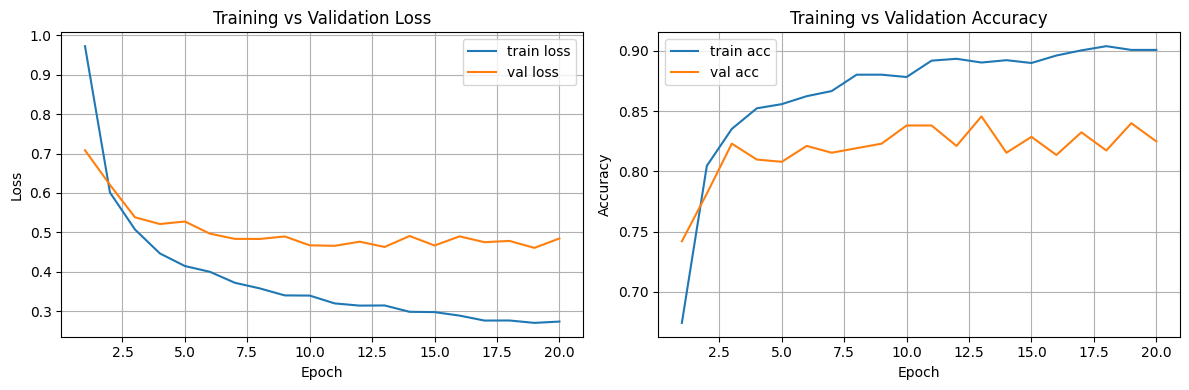


EVALUATING ON TEST SET


Testing: 100%|██████████| 18/18 [02:05<00:00,  6.95s/it]



Overall Test Results:
  Loss: 0.4821
  Accuracy: 0.8310 (467/562)

Per-class Test Accuracy:
  Pre-school (3-6)     acc = 0.8824  (120/136)
  Children (7-12)      acc = 0.6731  (70/104)
  Teens (13-17)        acc = 0.8406  (58/69)
  Young Adults (18-40) acc = 0.5974  (46/77)
  Adults (40-65)       acc = 0.9808  (153/156)
  Seniors (65+)        acc = 1.0000  (20/20)


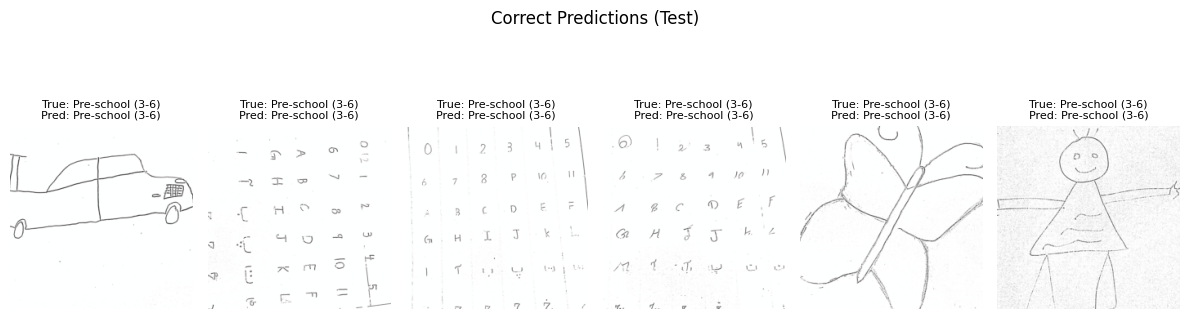

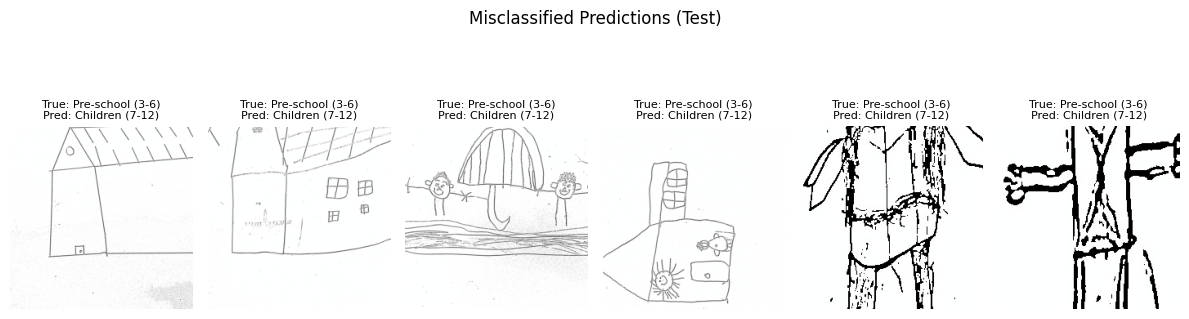


Model saved to: /content/drive/MyDrive/age_classifier_resnet50.pth


In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
from tqdm import tqdm

ImageFile.LOAD_TRUNCATED_IMAGES = True

# CONFIGURATION

# Defining our age groups and their paths
age_groups = {
    "Pre-school (3-6)": "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Pre-school (3-6)",
    "Children (7-12)": "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Children (7-12)",
    "Teens (13-17)": "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Teens (13-17)",
    "Young Adults (18-40)": "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Young Adults (18-40)",
    "Adults (40-65)": "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Adults (40-65)",
    "Seniors (65+)": "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Seniors (65+)",
}

# Number of classes (age groups)
num_classes = len(age_groups)
age_class_names = list(age_groups.keys())

print(f"Training with {num_classes} age classes:")
for i, name in enumerate(age_class_names):
    print(f"  {i}: {name}")

# LOAD DATA FROM TRAIN/VAL/TEST FOLDERS

def load_data_from_splits(age_groups):
    """
    Load images from pre-organized train/val/test folders
    Returns: train_items, val_items, test_items as lists of (image_path, label_idx)
    """

    train_items = []
    val_items = []
    test_items = []

    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff']

    for label_idx, (age_group_name, base_path) in enumerate(age_groups.items()):
        print(f"\nLoading {age_group_name} (label {label_idx})...")

        # Paths to train/val/test folders
        train_path = os.path.join(base_path, "train")
        val_path = os.path.join(base_path, "val")
        test_path = os.path.join(base_path, "test")

        # Load train
        if os.path.exists(train_path):
            train_files = [f for f in os.listdir(train_path)
                          if any(f.lower().endswith(ext) for ext in image_extensions)]
            for filename in train_files:
                train_items.append((os.path.join(train_path, filename), label_idx))
            print(f"  Train: {len(train_files)} images")
        else:
            print(f"  Train folder not found: {train_path}")

        # Load val
        if os.path.exists(val_path):
            val_files = [f for f in os.listdir(val_path)
                        if any(f.lower().endswith(ext) for ext in image_extensions)]
            for filename in val_files:
                val_items.append((os.path.join(val_path, filename), label_idx))
            print(f"  Val: {len(val_files)} images")
        else:
            print(f"  Val folder not found: {val_path}")

        # Load test
        if os.path.exists(test_path):
            test_files = [f for f in os.listdir(test_path)
                         if any(f.lower().endswith(ext) for ext in image_extensions)]
            for filename in test_files:
                test_items.append((os.path.join(test_path, filename), label_idx))
            print(f"  Test: {len(test_files)} images")
        else:
            print(f"  Test folder not found: {test_path}")

    return train_items, val_items, test_items

# Load the data
print("="*70)
print("LOADING DATA")
print("="*70)

train_items, val_items, test_items = load_data_from_splits(age_groups)

print(f"\nTotal dataset:")
print(f"  Train: {len(train_items)} images")
print(f"  Val:   {len(val_items)} images")
print(f"  Test:  {len(test_items)} images")

# Check distribution per class
print(f"\nPer-class distribution:")
for label_idx, age_name in enumerate(age_class_names):
    train_count = len([item for item in train_items if item[1] == label_idx])
    val_count = len([item for item in val_items if item[1] == label_idx])
    test_count = len([item for item in test_items if item[1] == label_idx])
    print(f"{age_name:20s} | Train: {train_count:4d} | Val: {val_count:4d} | Test: {test_count:4d}")

if len(train_items) == 0 or len(val_items) == 0 or len(test_items) == 0:
    raise ValueError("One or more splits are empty. Check data paths.")

# TRANSFORMS & DATASET

IMG_SIZE = 224

train_tf = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

val_tf = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

class AgeDataset(Dataset):
    def __init__(self, items, tf):
        self.items = items  # list of (path, label_idx)
        self.tf = tf

    def __len__(self):
        return len(self.items)

    def __getitem__(self, idx):
        p, y = self.items[idx]
        try:
            img = Image.open(p).convert("RGB")
        except Exception as e:
            print(f"Error loading {p}: {e}")
            return self.__getitem__((idx + 1) % len(self.items))
        img = self.tf(img)
        return img, torch.tensor(y, dtype=torch.long)

# CREATE DATALOADERS

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {DEVICE}")

BATCH_SIZE = 32

train_loader = DataLoader(
    AgeDataset(train_items, train_tf),
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=(DEVICE.type == 'cuda'),
)

val_loader = DataLoader(
    AgeDataset(val_items, val_tf),
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=(DEVICE.type == 'cuda'),
)

test_loader = DataLoader(
    AgeDataset(test_items, val_tf),
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=(DEVICE.type == 'cuda'),
)

print(f"\nDataloaders created:")
print(f"  Train batches: {len(train_loader)}")
print(f"  Val batches:   {len(val_loader)}")
print(f"  Test batches:  {len(test_loader)}")

# MODEL SETUP

print("\n" + "="*70)
print("SETTING UP MODEL")
print("="*70)

model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# Replace final layer
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

# Freeze backbone, train only final layer
for p in model.parameters():
    p.requires_grad = False
for p in model.fc.parameters():
    p.requires_grad = True

model = model.to(DEVICE)

print(f"ResNet50 loaded")
print(f"Final layer: {in_features} → {num_classes} classes")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

# TRAINING SETUP

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

EPOCHS = 50
PATIENCE = 7
best_val_acc = -1.0
best_state = None
epochs_without_improve = 0

history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

# TRAINING LOOP

print("\n" + "="*70)
print("STARTING TRAINING")
print("="*70)

for ep in range(1, EPOCHS + 1):
    # Train
    model.train()
    total_loss = 0
    total_correct = 0
    total_n = 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {ep}/{EPOCHS} [Train]", leave=False):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()

        logits = model(imgs)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        preds = logits.argmax(dim=1)
        total_loss += loss.item() * imgs.size(0)
        total_correct += (preds == labels).sum().item()
        total_n += labels.size(0)

    train_loss = total_loss / total_n
    train_acc = total_correct / total_n

    # Validate
    model.eval()
    val_loss = 0
    val_correct = 0
    val_n = 0

    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc=f"Epoch {ep}/{EPOCHS} [Val]", leave=False):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            logits = model(imgs)
            loss = criterion(logits, labels)
            preds = logits.argmax(dim=1)

            val_loss += loss.item() * imgs.size(0)
            val_correct += (preds == labels).sum().item()
            val_n += labels.size(0)

    val_loss /= val_n
    val_acc = val_correct / val_n

    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    print(f"Epoch {ep:02d} | "
          f"Train loss={train_loss:.4f} acc={train_acc:.4f} | "
          f"Val loss={val_loss:.4f} acc={val_acc:.4f} | "
          f"patience {epochs_without_improve}/{PATIENCE}")

    # Early stopping
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state = {k: v.cpu() for k, v in model.state_dict().items()}
        epochs_without_improve = 0
    else:
        epochs_without_improve += 1
        if epochs_without_improve >= PATIENCE:
            print("Early stopping (no validation accuracy improvement).")
            break

# Load best model
if best_state is not None:
    model.load_state_dict(best_state)
    model = model.to(DEVICE)
    print(f"\n✓ Loaded best model (val acc = {best_val_acc:.4f})")

epochs_ran = len(history["train_loss"])

# PLOT TRAINING CURVES

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs_ran + 1), history["train_loss"], label="train loss")
plt.plot(range(1, epochs_ran + 1), history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs_ran + 1), history["train_acc"], label="train acc")
plt.plot(range(1, epochs_ran + 1), history["val_acc"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# TEST SET EVALUATION

print("\n" + "="*70)
print("EVALUATING ON TEST SET")
print("="*70)

model.eval()
test_loss = 0
test_correct = 0
test_n = 0

per_class_correct = [0] * num_classes
per_class_total = [0] * num_classes

correct_examples = []
wrong_examples = []

with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Testing"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        logits = model(imgs)
        loss = criterion(logits, labels)
        preds = logits.argmax(dim=1)

        test_loss += loss.item() * imgs.size(0)
        test_correct += (preds == labels).sum().item()
        test_n += labels.size(0)

        for i in range(len(labels)):
            y_true = int(labels[i].item())
            y_pred = int(preds[i].item())
            per_class_total[y_true] += 1

            if y_true == y_pred:
                per_class_correct[y_true] += 1
                if len(correct_examples) < 6:
                    correct_examples.append((imgs[i].cpu(), y_true, y_pred))
            else:
                if len(wrong_examples) < 6:
                    wrong_examples.append((imgs[i].cpu(), y_true, y_pred))

test_loss /= test_n
test_acc = test_correct / test_n

print(f"\nOverall Test Results:")
print(f"  Loss: {test_loss:.4f}")
print(f"  Accuracy: {test_acc:.4f} ({test_correct}/{test_n})")

print(f"\nPer-class Test Accuracy:")
for idx, cls_name in enumerate(age_class_names):
    if per_class_total[idx] > 0:
        acc = per_class_correct[idx] / per_class_total[idx]
    else:
        acc = 0.0
    print(f"  {cls_name:20s} acc = {acc:.4f}  ({per_class_correct[idx]}/{per_class_total[idx]})")

# SHOWING EXAMPLE PREDICTIONS

def show_examples(examples, title):
    if not examples:
        print(f"No {title.lower()} examples collected.")
        return

    plt.figure(figsize=(12, 4))
    for i, (img, true_label, pred_label) in enumerate(examples):
        plt.subplot(1, len(examples), i + 1)
        img_np = img.permute(1, 2, 0).numpy()
        img_np = img_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        img_np = img_np.clip(0, 1)
        plt.imshow(img_np)
        plt.title(f"True: {age_class_names[true_label]}\nPred: {age_class_names[pred_label]}",
                 fontsize=8)
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_examples(correct_examples, "Correct Predictions (Test)")
show_examples(wrong_examples, "Misclassified Predictions (Test)")

# SAVE MODEL

model_save_path = "/content/drive/MyDrive/age_classifier_resnet50.pth"
torch.save(model.state_dict(), model_save_path)
print(f"\nModel saved to: {model_save_path}")

✓ Model loaded from: /content/drive/MyDrive/4995DLCV Final Project/age_classifier_resnet50.pth
✓ Using device: cuda
✓ Predicting 6 age classes
PREDICTING AGE CLASSES FOR AD with CD'S IMAGES

Found 41 images in /content/drive/MyDrive/4995DLCV Final Project/Dataset/Children (7-12)/dataset1 (Handwriting and Drawing Based Early Detection of A)/Processed_ASD_with_CD/Drawing


Predicting: 100%|██████████| 2/2 [00:16<00:00,  8.17s/it]



PREDICTION SUMMARY

Overall Distribution:
  Pre-school (3-6)    :   35 images (85.4%)
  Adults (40-65)      :    4 images (9.8%)
  Children (7-12)     :    2 images (4.9%)

Statistics:
  Total images: 41
  Most common prediction: Pre-school (3-6) (35 images)
  Average confidence: 0.715
  Min confidence: 0.429
  Max confidence: 0.965

Sample Predictions:
  IMG20240402121921.jpg          → Pre-school (3-6)     (conf: 0.829)
  IMG20240402122204.jpg          → Pre-school (3-6)     (conf: 0.894)
  IMG20240402122008.jpg          → Pre-school (3-6)     (conf: 0.764)
  IMG20240402121828.jpg          → Pre-school (3-6)     (conf: 0.735)
  IMG20240402122258.jpg          → Pre-school (3-6)     (conf: 0.742)
  IMG_20240402_122114.jpg        → Pre-school (3-6)     (conf: 0.639)
  IMG_20240402_123526.jpg        → Adults (40-65)       (conf: 0.691)
  IMG20240402122346.jpg          → Pre-school (3-6)     (conf: 0.780)
  IMG20240402122602.jpg          → Pre-school (3-6)     (conf: 0.485)
  IMG20240402

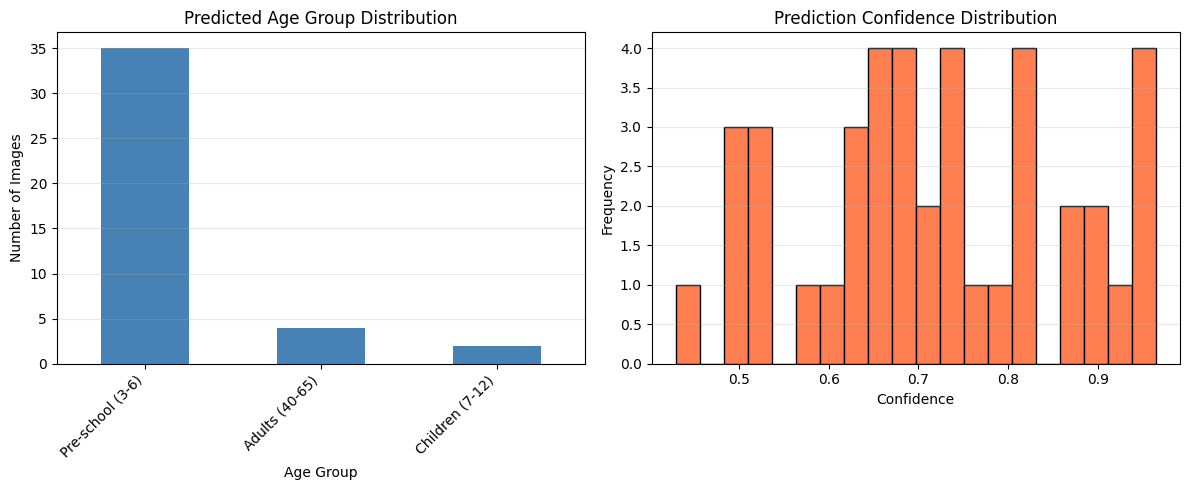


Showing example predictions...


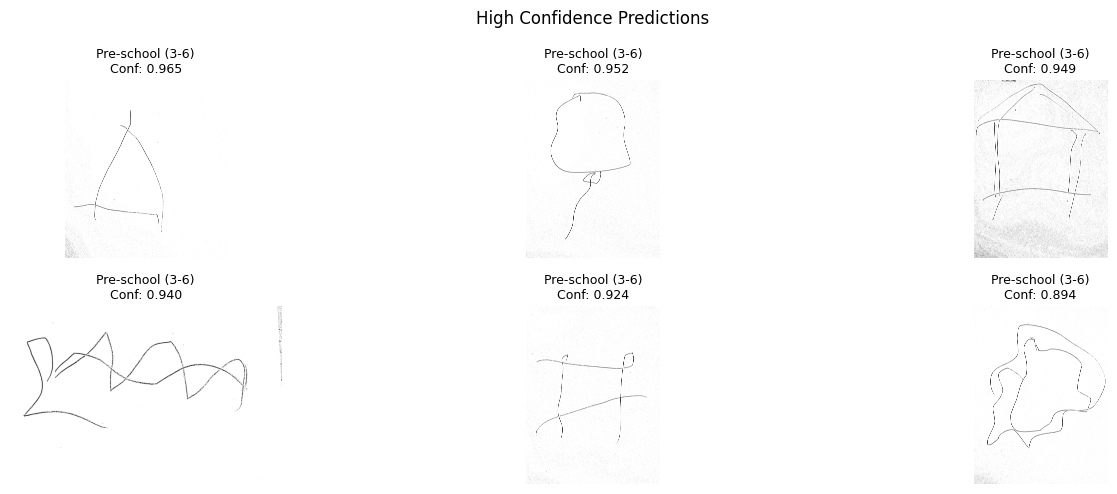

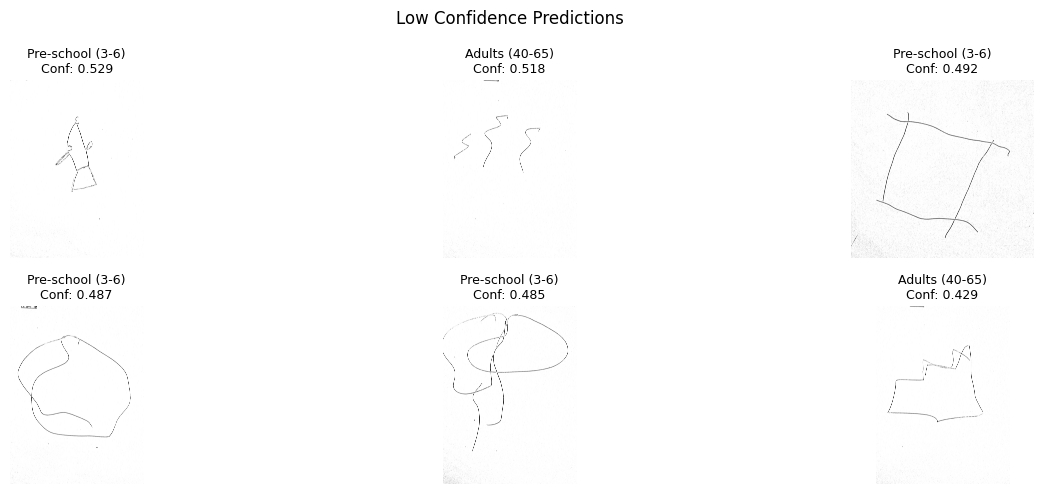

In [ ]:
# Using model to make observations on neurological disorders
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from collections import Counter

# LOAD TRAINED MODEL

num_classes = len(age_classes)

# Load the model architecture
model = models.resnet50(weights=None)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

# Load trained weights
model_path = "/content/drive/MyDrive/4995DLCV Final Project/age_classifier_resnet50.pth"
model.load_state_dict(torch.load(model_path))

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(DEVICE)
model.eval()  # Setting to evaluation mode

print(f"Model loaded from: {model_path}")
print(f"Using device: {DEVICE}")
print(f"Predicting {num_classes} age classes")

# DATASET FOR INFERENCE (NO LABELS)

class InferenceDataset(Dataset):
    """Dataset for images without labels"""

    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            img = Image.open(img_path).convert("RGB")
            img = self.transform(img)
            return img, img_path
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
            # Return a blank image if there's an error
            img = Image.new('RGB', (224, 224), color='white')
            img = self.transform(img)
            return img, img_path

# Same transform used during validation
inference_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# PREDICT ON NEW IMAGES (of disorders)

def predict_images(image_folder, model, transform, device, batch_size=32):
    """
    Predict age classes for all images in a folder

    Returns:
    - results: list of dicts with filename, predicted_class, predicted_label, confidence
    """

    # Collect all image paths
    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff']
    image_paths = []

    for filename in os.listdir(image_folder):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_paths.append(os.path.join(image_folder, filename))

    print(f"\nFound {len(image_paths)} images in {image_folder}")

    if len(image_paths) == 0:
        print("No images found.")
        return []

    # Create dataset and dataloader
    dataset = InferenceDataset(image_paths, transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Predict
    results = []

    with torch.no_grad():
        for imgs, paths in tqdm(dataloader, desc="Predicting"):
            imgs = imgs.to(device)

            # Get predictions
            logits = model(imgs)
            probs = torch.softmax(logits, dim=1)
            confidences, preds = torch.max(probs, dim=1)

            # Store results
            for i in range(len(paths)):
                filename = os.path.basename(paths[i])
                pred_idx = int(preds[i].item())
                pred_label = age_classes[pred_idx]
                confidence = float(confidences[i].item())

                results.append({
                    'filename': filename,
                    'predicted_class': pred_idx,
                    'predicted_label': pred_label,
                    'confidence': confidence
                })

    return results

# to see how diff models predict
def predict_images_topk(image_folder, model, transform, device, k=3, batch_size=32):
    """
    Predict age classes with top-k predictions
    """

    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff']
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder)
                   if any(f.lower().endswith(ext) for ext in image_extensions)]

    print(f"\nFound {len(image_paths)} images")

    dataset = InferenceDataset(image_paths, transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    results = []

    with torch.no_grad():
        for imgs, paths in tqdm(dataloader, desc="Predicting"):
            imgs = imgs.to(device)
            logits = model(imgs)
            probs = torch.softmax(logits, dim=1)

            # Get top-k predictions
            top_probs, top_indices = torch.topk(probs, k, dim=1)

            for i in range(len(paths)):
                filename = os.path.basename(paths[i])

                top_k_preds = []
                for j in range(k):
                    pred_idx = int(top_indices[i][j].item())
                    pred_label = age_classes[pred_idx]
                    prob = float(top_probs[i][j].item())
                    top_k_preds.append({
                        'rank': j + 1,
                        'class': pred_label,
                        'probability': prob
                    })

                results.append({
                    'filename': filename,
                    'top_predictions': top_k_preds
                })

    return results

# RUN PREDICTION ON AUTISM WITH CONDUCT DISORDER IMAGES (change to parkinson's accordingly)

# Path to Autism's images
autism_folder = "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Children (7-12)/dataset1 (Handwriting and Drawing Based Early Detection of A)/Processed_ASD_with_CD/Drawing"

print("="*70)
print("PREDICTING AGE CLASSES FOR AD with CD'S IMAGES")
print("="*70)

results = predict_images(autism_folder, model, inference_transform, DEVICE)

# Display results
"""
print("\nTop-3 Predictions for Sample Images:")
for i in range(min(5, len(results_topk))):
    result = results_topk[i]
    print(f"\n{result['filename']}:")
    for pred in result['top_predictions']:
        print(f"  {pred['rank']}. {pred['class']:20s} ({pred['probability']:.3f})")
"""

# ANALYZE RESULTS

if results:
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(results)

    print("\n" + "="*70)
    print("PREDICTION SUMMARY")
    print("="*70)

    # Overall distribution
    print("\nOverall Distribution:")
    distribution = df['predicted_label'].value_counts()
    for label, count in distribution.items():
        percentage = count / len(df) * 100
        print(f"  {label:20s}: {count:4d} images ({percentage:.1f}%)")

    # Statistics
    print(f"\nStatistics:")
    print(f"  Total images: {len(df)}")
    print(f"  Most common prediction: {distribution.index[0]} ({distribution.iloc[0]} images)")
    print(f"  Average confidence: {df['confidence'].mean():.3f}")
    print(f"  Min confidence: {df['confidence'].min():.3f}")
    print(f"  Max confidence: {df['confidence'].max():.3f}")

    # Show some examples
    print("\nSample Predictions:")
    for i in range(min(10, len(df))):
        row = df.iloc[i]
        print(f"  {row['filename']:30s} → {row['predicted_label']:20s} (conf: {row['confidence']:.3f})")

    # Save results to CSV
    output_csv = os.path.join(autism_folder, "predictions.csv")
    df.to_csv(output_csv, index=False)
    print(f"\nResults saved to: {output_csv}")

    # VISUALIZE DISTRIBUTION

    plt.figure(figsize=(12, 5))

    # Plot 1: Count distribution
    plt.subplot(1, 2, 1)
    distribution.plot(kind='bar', color='steelblue')
    plt.title('Predicted Age Group Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Plot 2: Confidence distribution
    plt.subplot(1, 2, 2)
    plt.hist(df['confidence'], bins=20, color='coral', edgecolor='black')
    plt.title('Prediction Confidence Distribution')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # SHOW EXAMPLE IMAGES WITH PREDICTIONS

    print("\nShowing example predictions...")

    # Show some high-confidence and low-confidence examples
    df_sorted = df.sort_values('confidence', ascending=False)

    # High confidence examples
    high_conf_examples = df_sorted.head(6)

    plt.figure(figsize=(15, 5))
    for i, (idx, row) in enumerate(high_conf_examples.iterrows()):
        if i >= 6:
            break

        img_path = os.path.join(autism_folder, row['filename'])
        img = Image.open(img_path)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
        plt.title(f"{row['predicted_label']}\nConf: {row['confidence']:.3f}", fontsize=9)
        plt.axis('off')

    plt.suptitle("High Confidence Predictions")
    plt.tight_layout()
    plt.show()

    # Low confidence examples
    low_conf_examples = df_sorted.tail(6)

    plt.figure(figsize=(15, 5))
    for i, (idx, row) in enumerate(low_conf_examples.iterrows()):
        if i >= 6:
            break

        img_path = os.path.join(autism_folder, row['filename'])
        img = Image.open(img_path)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
        plt.title(f"{row['predicted_label']}\nConf: {row['confidence']:.3f}", fontsize=9)
        plt.axis('off')

    plt.suptitle("Low Confidence Predictions")
    plt.tight_layout()
    plt.show()

else:
    print("No predictions made. Check image folder path.")

PREDICTING AGE CLASSES FOR PARKINSON'S IMAGES

Found 100 images in /content/drive/MyDrive/4995DLCV Final Project/Dataset/Adults (40-65)/HandPD dataset/Age_40-65_Patient_Processed


Predicting: 100%|██████████| 4/4 [00:14<00:00,  3.59s/it]



PREDICTION SUMMARY

Overall Distribution:
  Adults (40-65)      :   67 images (67.0%)
  Seniors (65+)       :   32 images (32.0%)
  Children (7-12)     :    1 images (1.0%)

Statistics:
  Total images: 100
  Most common prediction: Adults (40-65) (67 images)
  Average confidence: 0.799
  Min confidence: 0.337
  Max confidence: 0.999

Sample Predictions:
  mea1-P6.jpg                    → Seniors (65+)        (conf: 0.891)
  mea3-P12.jpg                   → Seniors (65+)        (conf: 0.699)
  mea3-P16.jpg                   → Seniors (65+)        (conf: 0.463)
  mea3-P1.jpg                    → Adults (40-65)       (conf: 0.979)
  mea3-P2.jpg                    → Adults (40-65)       (conf: 0.988)
  mea4-P23.jpg                   → Adults (40-65)       (conf: 0.945)
  mea2-P28.jpg                   → Seniors (65+)        (conf: 0.645)
  mea1-P11.jpg                   → Seniors (65+)        (conf: 0.857)
  mea4-P9.jpg                    → Adults (40-65)       (conf: 0.704)
  mea1-P12.jp

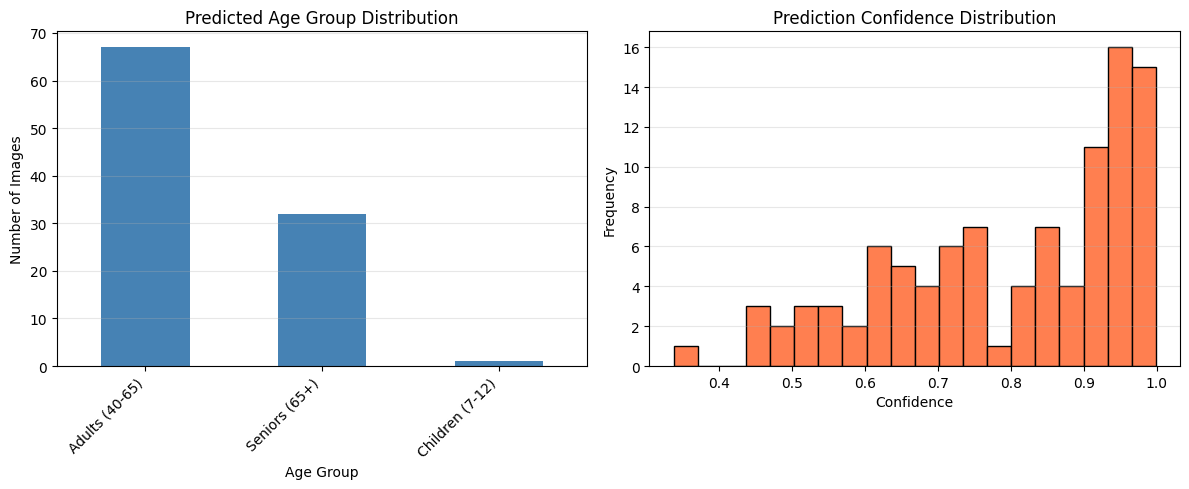


Showing example predictions...


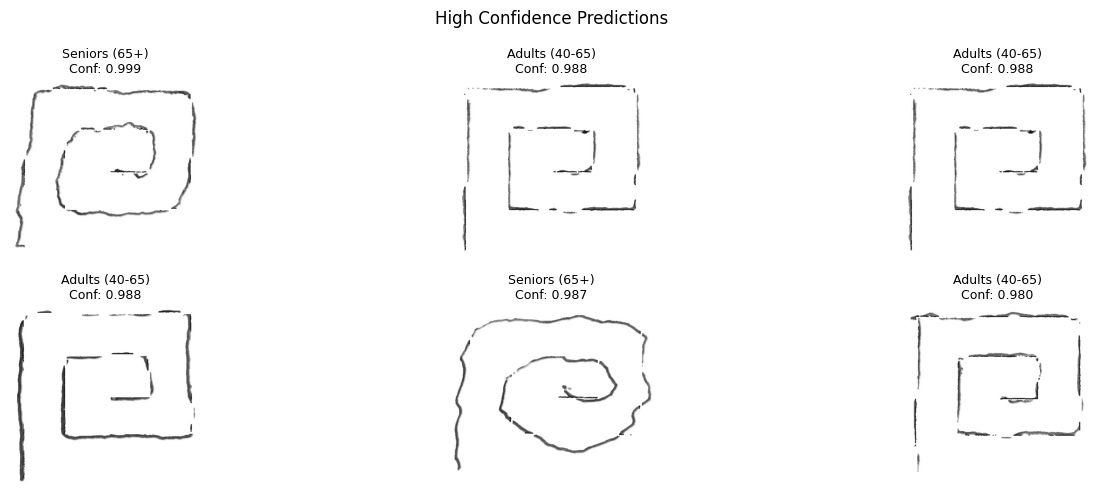

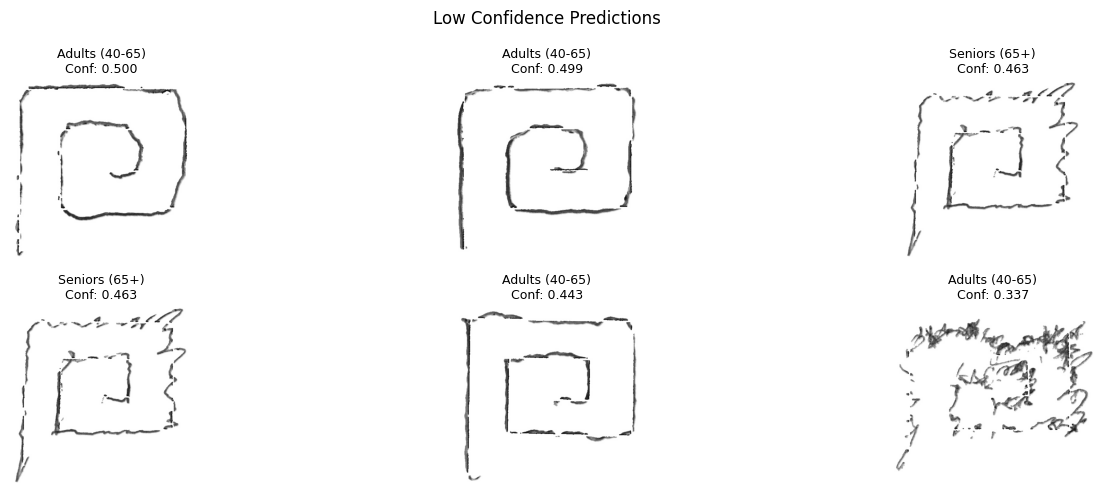

In [ ]:

# RUN PREDICTION ON PARKINSON'S IMAGES

# Path to Parkinson's images
parkinsons_folder = "/content/drive/MyDrive/4995DLCV Final Project/Dataset/Adults (40-65)/HandPD dataset/Age_40-65_Patient_Processed"

print("="*70)
print("PREDICTING AGE CLASSES FOR PARKINSON'S IMAGES")
print("="*70)

results = predict_images(parkinsons_folder, model, inference_transform, DEVICE)

# Display results
"""
print("\nTop-3 Predictions for Sample Images:")
for i in range(min(5, len(results_topk))):
    result = results_topk[i]
    print(f"\n{result['filename']}:")
    for pred in result['top_predictions']:
        print(f"  {pred['rank']}. {pred['class']:20s} ({pred['probability']:.3f})")
"""

# ANALYZE RESULTS

if results:
    # Convert to DataFrame for easier analysis
    df = pd.DataFrame(results)

    print("\n" + "="*70)
    print("PREDICTION SUMMARY")
    print("="*70)

    # Overall distribution
    print("\nOverall Distribution:")
    distribution = df['predicted_label'].value_counts()
    for label, count in distribution.items():
        percentage = count / len(df) * 100
        print(f"  {label:20s}: {count:4d} images ({percentage:.1f}%)")

    # Statistics
    print(f"\nStatistics:")
    print(f"  Total images: {len(df)}")
    print(f"  Most common prediction: {distribution.index[0]} ({distribution.iloc[0]} images)")
    print(f"  Average confidence: {df['confidence'].mean():.3f}")
    print(f"  Min confidence: {df['confidence'].min():.3f}")
    print(f"  Max confidence: {df['confidence'].max():.3f}")

    # Show some examples
    print("\nSample Predictions:")
    for i in range(min(10, len(df))):
        row = df.iloc[i]
        print(f"  {row['filename']:30s} → {row['predicted_label']:20s} (conf: {row['confidence']:.3f})")

    # Save results to CSV
    output_csv = os.path.join(parkinsons_folder, "predictions.csv")
    df.to_csv(output_csv, index=False)
    print(f"\nResults saved to: {output_csv}")

    # VISUALIZE DISTRIBUTION

    plt.figure(figsize=(12, 5))

    # Plot 1: Count distribution
    plt.subplot(1, 2, 1)
    distribution.plot(kind='bar', color='steelblue')
    plt.title('Predicted Age Group Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Plot 2: Confidence distribution
    plt.subplot(1, 2, 2)
    plt.hist(df['confidence'], bins=20, color='coral', edgecolor='black')
    plt.title('Prediction Confidence Distribution')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # SHOW EXAMPLE IMAGES WITH PREDICTIONS

    print("\nShowing example predictions...")

    # Show some high-confidence and low-confidence examples
    df_sorted = df.sort_values('confidence', ascending=False)

    # High confidence examples
    high_conf_examples = df_sorted.head(6)

    plt.figure(figsize=(15, 5))
    for i, (idx, row) in enumerate(high_conf_examples.iterrows()):
        if i >= 6:
            break

        img_path = os.path.join(parkinsons_folder, row['filename'])
        img = Image.open(img_path)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
        plt.title(f"{row['predicted_label']}\nConf: {row['confidence']:.3f}", fontsize=9)
        plt.axis('off')

    plt.suptitle("High Confidence Predictions")
    plt.tight_layout()
    plt.show()

    # Low confidence examples
    low_conf_examples = df_sorted.tail(6)

    plt.figure(figsize=(15, 5))
    for i, (idx, row) in enumerate(low_conf_examples.iterrows()):
        if i >= 6:
            break

        img_path = os.path.join(parkinsons_folder, row['filename'])
        img = Image.open(img_path)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
        plt.title(f"{row['predicted_label']}\nConf: {row['confidence']:.3f}", fontsize=9)
        plt.axis('off')

    plt.suptitle("Low Confidence Predictions")
    plt.tight_layout()
    plt.show()

else:
    print("No predictions made. Check image folder path.")